## Tablet dataset

In [38]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
#from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [39]:
data=pd.read_csv('ramanset.csv')

In [40]:
data

,Serial,weight,Type,3600,3599,3598,3597,3596,3595,3594,...,209,208,207,206,205,204,203,202,201,200
0,02_01,5.286487,1,0.37648,0.34072,0.31380,0.30117,0.30560,0.32572,0.35712,...,59.603298,59.479729,59.361912,59.216850,59.018200,58.732979,58.320450,57.722679,56.868259,55.697010
1,02_02,5.252417,1,0.46181,0.46536,0.46727,0.46541,0.45869,0.44758,0.43413,...,62.156342,62.022228,61.890862,61.727539,61.506962,61.193272,60.738701,60.072491,59.107941,57.775730
2,02_03,5.494624,1,0.31230,0.31096,0.32811,0.36561,0.42090,0.48596,0.54929,...,61.037392,60.868259,60.701649,60.503288,60.251518,59.918880,59.468910,58.841530,57.956501,56.742352
3,02_04,5.496264,1,0.80430,0.82030,0.83026,0.83234,0.82650,0.81450,0.79965,...,60.487961,60.387821,60.283081,60.131451,59.901779,59.558048,59.059399,58.348389,57.355640,56.028000
4,02_05,5.729499,1,0.59895,0.60989,0.61788,0.62057,0.61810,0.61321,0.60997,...,61.957829,61.879768,61.802261,61.686989,61.507820,61.233830,60.826511,60.226360,59.355900,58.148998
5,02_06,5.569755,1,0.64465,0.65743,0.66375,0.66485,0.66478,0.66885,0.68023,...,62.326691,62.150349,61.992470,61.814449,61.585709,61.265701,60.804359,60.131432,59.163490,57.836048
6,02_07,5.236559,1,0.56045,0.55301,0.54481,0.53818,0.53455,0.53427,0.53577,...,60.911819,60.792080,60.674091,60.526531,60.327000,60.042210,59.625858,59.008259,58.103870,56.845901
7,02_08,5.381310,1,0.83723,0.83928,0.84924,0.86269,0.87559,0.88639,0.89604,...,60.258190,60.135071,60.015080,59.864990,59.662338,59.379761,58.981819,58.412552,57.597561,56.471272
8,02_09,5.300429,1,0.69813,0.71003,0.69983,0.67243,0.63743,0.60670,0.59051,...,61.400101,61.287560,61.173618,61.015171,60.783360,60.445400,59.963482,59.280720,58.324402,57.035160
9,02_10,5.606874,1,0.91390,1.01411,1.11422,1.20139,1.26664,1.30624,1.32138,...,60.645672,60.468262,60.239861,59.944530,59.587379,59.168911,58.674759,58.056919,57.235359,56.128521


In [41]:
feature_col=['Type']
for i in xrange(3600,199,-1):
    feature_col.append(str(i));

In [42]:
feature_col

['Type',
 '3600',
 '3599',
 '3598',
 '3597',
 '3596',
 '3595',
 '3594',
 '3593',
 '3592',
 '3591',
 '3590',
 '3589',
 '3588',
 '3587',
 '3586',
 '3585',
 '3584',
 '3583',
 '3582',
 '3581',
 '3580',
 '3579',
 '3578',
 '3577',
 '3576',
 '3575',
 '3574',
 '3573',
 '3572',
 '3571',
 '3570',
 '3569',
 '3568',
 '3567',
 '3566',
 '3565',
 '3564',
 '3563',
 '3562',
 '3561',
 '3560',
 '3559',
 '3558',
 '3557',
 '3556',
 '3555',
 '3554',
 '3553',
 '3552',
 '3551',
 '3550',
 '3549',
 '3548',
 '3547',
 '3546',
 '3545',
 '3544',
 '3543',
 '3542',
 '3541',
 '3540',
 '3539',
 '3538',
 '3537',
 '3536',
 '3535',
 '3534',
 '3533',
 '3532',
 '3531',
 '3530',
 '3529',
 '3528',
 '3527',
 '3526',
 '3525',
 '3524',
 '3523',
 '3522',
 '3521',
 '3520',
 '3519',
 '3518',
 '3517',
 '3516',
 '3515',
 '3514',
 '3513',
 '3512',
 '3511',
 '3510',
 '3509',
 '3508',
 '3507',
 '3506',
 '3505',
 '3504',
 '3503',
 '3502',
 '3501',
 '3500',
 '3499',
 '3498',
 '3497',
 '3496',
 '3495',
 '3494',
 '3493',
 '3492',
 '3491',
 

In [43]:
y=data['weight']
y.head()

0    5.286487
1    5.252417
2    5.494624
3    5.496264
4    5.729499
Name: weight, dtype: float64

In [44]:
X=data[feature_col]
X.head()

,Type,3600,3599,3598,3597,3596,3595,3594,3593,3592,...,209,208,207,206,205,204,203,202,201,200
0,1,0.37648,0.34072,0.31380,0.30117,0.30560,0.32572,0.35712,0.39188,0.42335,...,59.603298,59.479729,59.361912,59.216850,59.018200,58.732979,58.320450,57.722679,56.868259,55.697010
1,1,0.46181,0.46536,0.46727,0.46541,0.45869,0.44758,0.43413,0.42185,0.41460,...,62.156342,62.022228,61.890862,61.727539,61.506962,61.193272,60.738701,60.072491,59.107941,57.775730
2,1,0.31230,0.31096,0.32811,0.36561,0.42090,0.48596,0.54929,0.59700,0.61931,...,61.037392,60.868259,60.701649,60.503288,60.251518,59.918880,59.468910,58.841530,57.956501,56.742352
3,1,0.80430,0.82030,0.83026,0.83234,0.82650,0.81450,0.79965,0.78530,0.77486,...,60.487961,60.387821,60.283081,60.131451,59.901779,59.558048,59.059399,58.348389,57.355640,56.028000
4,1,0.59895,0.60989,0.61788,0.62057,0.61810,0.61321,0.60997,0.61180,0.62084,...,61.957829,61.879768,61.802261,61.686989,61.507820,61.233830,60.826511,60.226360,59.355900,58.148998


Applied PCA before, but was giving poor results

In [45]:
#X.as_matrix()
#X.shape

In [46]:
#pca = PCA(n_components=3401)
#pca.fit(X)
#X = pca.transform(X)
#X

Training Test split and applied gaussian process regression that is giving good results.

In [47]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [48]:
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     random_start=100)
gp.fit(X_train, y_train)

GaussianProcess(beta0=None, corr=<function squared_exponential at 0x2f37cf8>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=100,
        random_state=<mtrand.RandomState object at 0x23f0090>,
        regr=<function constant at 0x2f37938>, storage_mode='full',
        theta0=array([[ 0.1]]), thetaL=array([[ 0.001]]),
        thetaU=array([[1]]), verbose=False)

In [49]:
y_pred, MSE = gp.predict(X_test, eval_MSE=True)
sigma = np.sqrt(MSE)

In [50]:
from sklearn import metrics
MAD= metrics.mean_squared_error(y_test,y_pred)
print MAD

0.226586190397


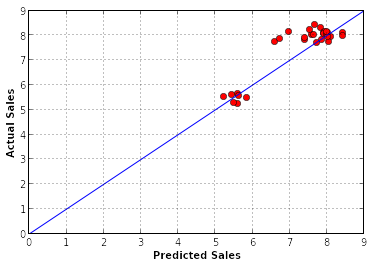

In [51]:
fig = plt.figure()
axes=fig.add_subplot(111)
a=np.arange(10)
axes.plot(y_pred, y_test, color='red',linestyle='',marker='o')
axes.plot(a,a, color='b',linestyle='-')
axes.set_xlabel('Predicted Sales',fontweight='bold')
axes.set_ylabel('Actual Sales',fontweight='bold')
axes.grid()

fig.savefig('tablet.png')
plt.show()